Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


Simulate Sales Data

In [2]:
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'Order Date': pd.date_range(start='2021-01-01', periods=n, freq='D'),
    'Region': np.random.choice(['East', 'West', 'Central', 'South'], size=n),
    'Category': np.random.choice(['Furniture', 'Office Supplies', 'Technology'], size=n),
    'Sales': np.random.uniform(20, 1000, size=n),
    'Quantity': np.random.randint(1, 10, size=n),
    'Discount': np.random.uniform(0, 0.5, size=n),
    'Profit': np.random.uniform(-200, 300, size=n)
})

data['Month'] = data['Order Date'].dt.to_period('M').astype(str)
data['Year'] = data['Order Date'].dt.year

data.head()


,Order Date,Region,Category,Sales,Quantity,Discount,Profit,Month,Year
0,2021-01-01,Central,Office Supplies,896.590332,4,0.435707,-119.316321,2021-01,2021
1,2021-01-02,South,Technology,991.645828,2,0.336351,85.997939,2021-01,2021
2,2021-01-03,East,Furniture,80.286686,5,0.398341,202.716165,2021-01,2021
3,2021-01-04,Central,Furniture,885.248144,3,0.125234,180.080465,2021-01,2021
4,2021-01-05,Central,Furniture,525.757440,9,0.312437,-123.050048,2021-01,2021


Total Sales by Region

<ipython-input-3-e9ba1981c746>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Region', y='Sales', estimator=sum, ci=None, palette='viridis')
<ipython-input-3-e9ba1981c746>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Region', y='Sales', estimator=sum, ci=None, palette='viridis')


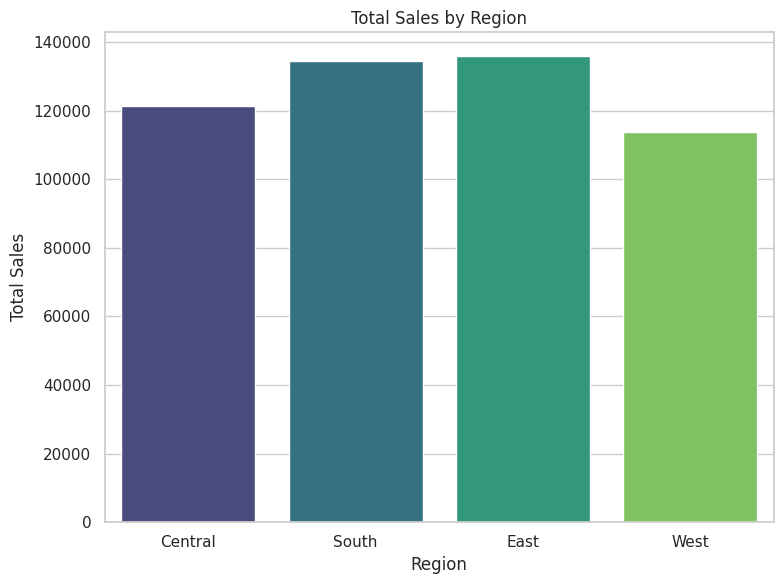

In [3]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Region', y='Sales', estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

Sales Distribution by Category

<ipython-input-4-11a253dc467b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Sales', palette='pastel')


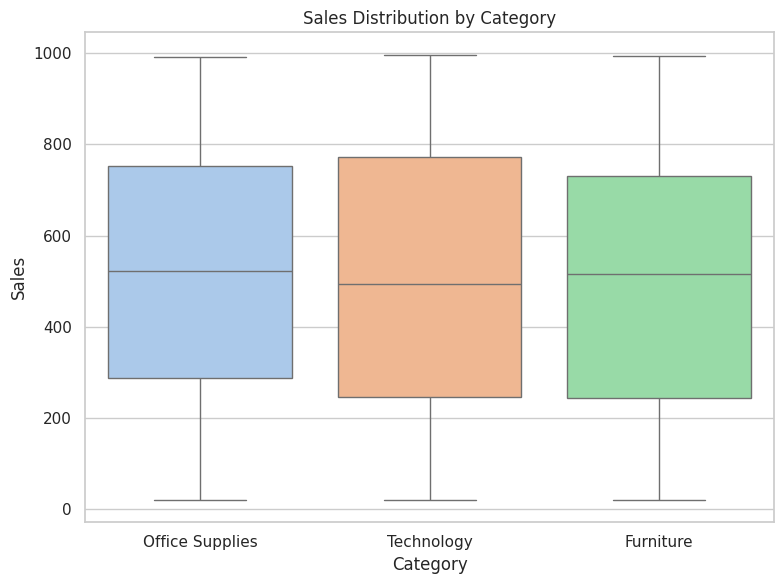

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Category', y='Sales', palette='pastel')
plt.title('Sales Distribution by Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


Monthly Sales Trend

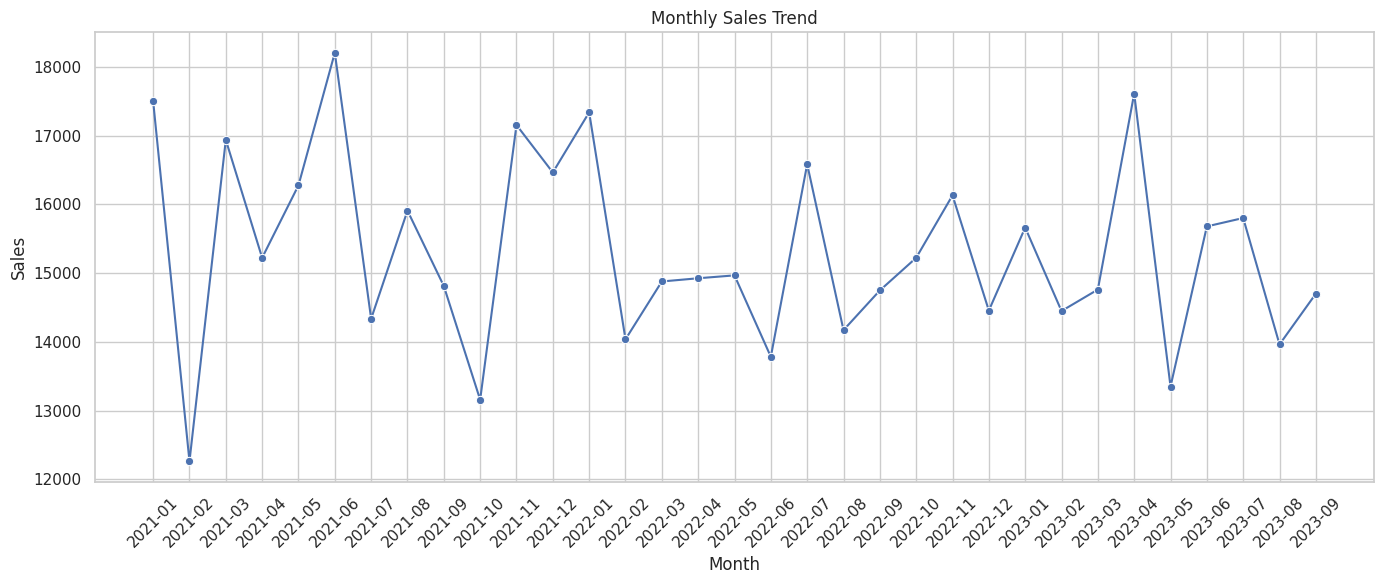

In [5]:
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Profit vs. Discount by Category

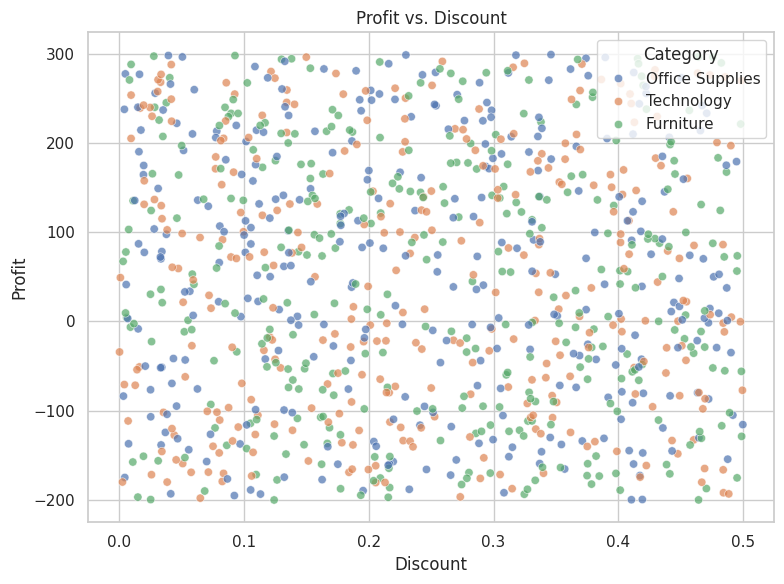

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Profit vs. Discount')
plt.tight_layout()
plt.show()


Correlation Heatmap

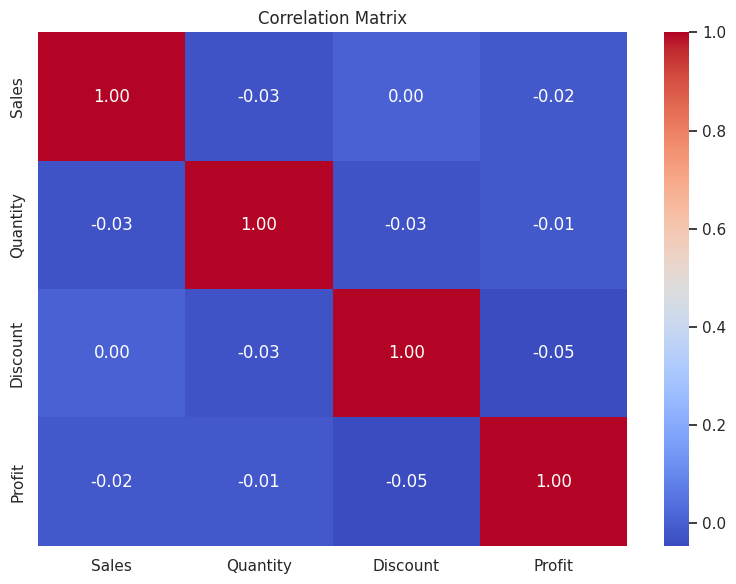

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
